In [37]:
# This cell is added by sphinx-gallery
# It can be customized to whatever you like
%matplotlib inline
# !pip install pennylane

Understanding the Haar measure
==============================

::: {.meta}
:property=\"og:description\": Learn all about the Haar measure and how
to randomly sample quantum states.

:property=\"og:image\":
<https://pennylane.ai/qml/_images/spherical_int_dtheta.png>
:::

::: {.related}
tutorial\_unitary\_designs Unitary designs quantum\_volume Quantum
volume qsim\_beyond\_classical Beyond classical computing with qsim
tutorial\_barren\_plateaus Barren plateaus in quantum neural networks
:::

*Author: Olivia Di Matteo --- Posted: 22 March 2021. Last updated: 22
March 2021.*

If you\'ve ever dug into the literature about random quantum circuits,
variational ansatz structure, or anything related to the structure and
properties of unitary operations, you\'ve likely come across a statement
like the following: \"Assume that $U$ is sampled uniformly at random
from the Haar measure\". In this demo, we\'re going to unravel this
cryptic statement and take an in-depth look at what it means. You\'ll
gain an understanding of the general concept of a *measure*, the Haar
measure and its special properties, and you\'ll learn how to sample from
it using tools available in PennyLane and other scientific computing
frameworks. By the end of this demo, you\'ll be able to include that
important statement in your own work with confidence!

::: {.note}
::: {.title}
Note
:::

To get the most out of this demo, it is helpful if you are familiar with
[integration of multi-dimensional
functions](https://en.wikipedia.org/wiki/Multiple_integral), the [Bloch
sphere](https://en.wikipedia.org/wiki/Bloch_sphere), and the conceptual
ideas behind
[decompositions](https://en.wikipedia.org/wiki/Matrix_decomposition) and
factorizations of unitary matrices (see, e.g., 4.5.1 and 4.5.2 of).
:::

Measure
-------

[Measure theory](https://en.wikipedia.org/wiki/Measure_(mathematics)) is
a branch of mathematics that studies things that are measurable---think
length, area, or volume, but generalized to mathematical spaces and even
higher dimensions. Loosely, the measure tells you about how \"stuff\" is
distributed and concentrated in a mathematical set or space. An
intuitive way to understand the measure is to think about a sphere. An
arbitrary point on a sphere can be parametrized by three
numbers---depending on what you\'re doing, you may use Cartesian
coordinates $(x, y, z)$, or it may be more convenient to use spherical
coordinates $(\rho, \phi, \theta)$.

Suppose you wanted to compute the volume of a solid sphere with radius
$r$. This can be done by integrating over the three coordinates
$\rho, \phi$, and $\theta$. Your first thought here may be to simply
integrate each parameter over its full range, like so:

$$V = \int_0^{r} \int_0^{2\pi} \int_0^{\pi} d\rho~ d\phi~ d\theta = 2\pi^2 r$$

But, we know that the volume of a sphere of radius $r$ is
$\frac{4}{3}\pi r^3$, so what we got from this integral is clearly
wrong! Taking the integral naively like this doesn\'t take into account
the structure of the sphere with respect to the parameters. For example,
consider two small, infinitesimal elements of area with the same
difference in $\theta$ and $\phi$, but at different values of $\theta$:

![](/demonstrations/haar_measure/spherical_int_dtheta.png){.align-center
width="50.0%"}

Even though the differences $d\theta$ and $d\phi$ themselves are the
same, there is way more \"stuff\" near the equator of the sphere than
there is near the poles. We must take into account the value of $\theta$
when computing the integral! Specifically, we multiply by the function
$\sin\theta$\-\--the properties of the $\sin$ function mean that the
most weight will occur around the equator where $\theta=\pi/2$, and the
least weight near the poles where $\theta=0$ and $\theta=\pi$.

Similar care must be taken for $\rho$. The contribution to volume of
parts of the sphere with a large $\rho$ is far more than for a small
$\rho$\-\--we should expect the contribution to be proportional to
$\rho^2$, given that the surface area of a sphere of radius $r$ is
$4\pi r^2$.

On the other hand, for a fixed $\rho$ and $\theta$, the length of the
$d\phi$ is the same all around the circle. If put all these facts
together, we find that the actual expression for the integral should
look like this:

$$V = \int_0^r \int_0^{2\pi} \int_0^{\pi} \rho^2 \sin \theta~ d\rho~ d\phi~
d\theta = \frac{4}{3}\pi r^3$$

These extra terms that we had to add to the integral, $\rho^2 \sin
\theta$, constitute the *measure*. The measure weights portions of the
sphere differently depending on where they are in the space. While we
need to know the measure to properly integrate over the sphere,
knowledge of the measure also gives us the means to perform another
important task, that of sampling points in the space uniformly at
random. We can\'t simply sample each parameter from the uniform
distribution over its domain---as we experienced already, this doesn\'t
take into account how the sphere is spread out over space. The measure
describes the distribution of each parameter and gives a recipe for
sampling them in order to obtain something properly uniform.

The Haar measure
----------------

Operations in quantum computing are described by unitary matrices.
Unitary matrices, like points on a sphere, can be expressed in terms of
a fixed set of coordinates, or parameters. For example, the most general
single-qubit rotation implemented in PennyLane
(`~.pennylane.Rot`{.interpreted-text role="class"}) is expressed in
terms of three parameters like so,

$$\begin{aligned}
U(\phi, \theta, \omega) = \begin{pmatrix} e^{-i(\phi + \omega)/2}
                    \cos(\theta/2) & -e^{i(\phi - \omega)/2} \sin(\theta/2)
                    \\ e^{-i(\phi - \omega)/2} \sin(\theta/2) & e^{i(\phi +
                    \omega)/2} \cos(\theta/2) \end{pmatrix}.
\end{aligned}$$

For every dimension $N$, the unitary matrices of size $N \times N$
constitute the *unitary group* $U(N)$. We can perform operations on
elements of this group, such as apply functions to them, integrate over
them, or sample uniformly over them, just as we can do to points on a
sphere. When we do such tasks with respect to the sphere, we have to add
the measure in order to properly weight the different regions of space.
The *Haar measure* provides the analogous terms we need for working with
the unitary group.

For an $N$-dimensional system, the Haar measure, often denoted by
$\mu_N$, tells us how to weight the elements of $U(N)$. For example,
suppose $f$ is a function that acts on elements of $U(N)$, and we would
like to take its integral over the group. We must write this integral
with respect to the Haar measure, like so:

$$\int_{V \in U(N)} f(V) d\mu_N(V).$$

As with the measure term of the sphere, $d\mu_N$ itself can be broken
down into components depending on individual parameters. While the Haar
measure can be defined for every dimension $N$, the mathematical form
gets quite hairy for larger dimensions---in general, an $N$-dimensional
unitary requires at least $N^2 - 1$ parameters, which is a lot to keep
track of! Therefore we\'ll start with the case of a single qubit
$(N=2)$, then show how things generalize.

### Single-qubit Haar measure

The single-qubit case provides a particularly nice entry point because
we can continue our comparison to spheres by visualizing single-qubit
states on the Bloch sphere. As expressed above, the measure provides a
recipe for sampling elements of the unitary group in a properly uniform
manner, given the structure of the group. One useful consequence of this
is that it provides a method to sample quantum *states* uniformly at
random---we simply generate Haar-random unitaries, and apply them to a
fixed basis state such as $\vert 0\rangle$.

We\'ll see how this works in good time. First, we\'ll take a look at
what happens when we ignore the measure and do things *wrong*. Suppose
we sample quantum states by applying unitaries obtained by the
parametrization above, but sample the angles $\omega, \phi$, and
$\theta$ from the flat uniform distribution between $[0, 2\pi)$ (fun
fact: there is a measure implicit in this kind of sampling too! It just
has a constant value, because each point is equally likely to be
sampled).


In [38]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

# set the random seed
np.random.seed(42)

# Use the mixed state simulator to save some steps in plotting later
dev = qml.device('default.mixed', wires=1)

@qml.qnode(dev)
def not_a_haar_random_unitary():
    # Sample all parameters from their flat uniform distribution
    phi, theta, omega = 2 * np.pi * np.random.uniform(size=3)
    qml.Rot(phi, theta, omega, wires=0)
    return qml.state()

num_samples = 2021

not_haar_samples = [not_a_haar_random_unitary() for _ in range(num_samples)]

In order to plot these on the Bloch sphere, we\'ll need to do one more
step, and convert the quantum states into Bloch vectors.


In [39]:
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])

# Used the mixed state simulator so we could have the density matrix for this part!
def convert_to_bloch_vector(rho):
    """Convert a density matrix to a Bloch vector."""
    ax = np.trace(np.dot(rho, X)).real
    ay = np.trace(np.dot(rho, Y)).real
    az = np.trace(np.dot(rho, Z)).real
    return [ax, ay, az]

not_haar_bloch_vectors = np.array([convert_to_bloch_vector(s) for s in not_haar_samples])

With this done, let\'s find out where our \"uniformly random\" states
ended up:


<ipython-input-40-8623f0bf407e>:10: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 7


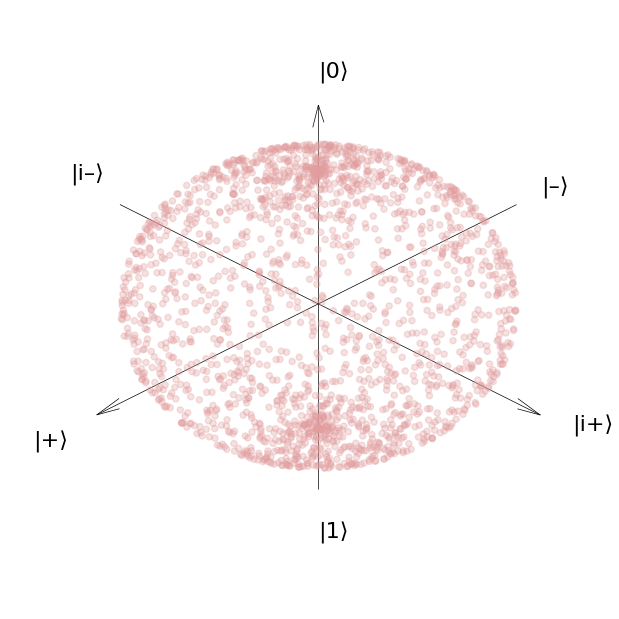

In [40]:
def plot_bloch_sphere(bloch_vectors):
    """ Helper function to plot vectors on a sphere."""
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    ax.grid(False)
    ax.set_axis_off()
    ax.view_init(30, 45)
    ax.dist = 7

    # Draw the axes (source: https://github.com/matplotlib/matplotlib/issues/13575)
    x, y, z = np.array([[-1.5,0,0], [0,-1.5,0], [0,0,-1.5]])
    u, v, w = np.array([[3,0,0], [0,3,0], [0,0,3]])
    ax.quiver(x, y, z, u, v, w, arrow_length_ratio=0.05, color="black", linewidth=0.5)

    ax.text(0, 0, 1.7, r"|0⟩", color="black", fontsize=16)
    ax.text(0, 0, -1.9, r"|1⟩", color="black", fontsize=16)
    ax.text(1.9, 0, 0, r"|+⟩", color="black", fontsize=16)
    ax.text(-1.7, 0, 0, r"|–⟩", color="black", fontsize=16)
    ax.text(0, 1.7, 0, r"|i+⟩", color="black", fontsize=16)
    ax.text(0,-1.9, 0, r"|i–⟩", color="black", fontsize=16)

    ax.scatter(
        bloch_vectors[:,0], bloch_vectors[:,1], bloch_vectors[:, 2], c='#e29d9e', alpha=0.3
    )

plot_bloch_sphere(not_haar_bloch_vectors)

You can see from this plot that even though our parameters were sampled
from a uniform distribution, there is a noticeable amount of clustering
around the poles of the sphere. Despite the input parameters being
uniform, the output is very much *not* uniform. Just like the regular
sphere, the measure is larger near the equator, and if we just sample
uniformly, we won\'t end up populating that area as much. To take that
into account we will need to sample from the proper Haar measure, and
weight the different parameters appropriately.

For a single qubit, the Haar measure looks much like the case of a
sphere, minus the radial component. Intuitively, all qubit state vectors
have length 1, so it makes sense that this wouldn\'t play a role here.
The parameter that we will have to weight differently is $\theta$, and
in fact the adjustment in measure is identical to that we had to do with
the polar axis of the sphere, i.e., $\sin \theta$. In order to sample
the $\theta$ uniformly at random in this context, we must sample from
the distribution $\hbox{Pr}(\theta) = \sin \theta$. We can accomplish
this by setting up a custom probability distribution with
[rv\_continuous](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous)
in `scipy`.


<ipython-input-40-8623f0bf407e>:10: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 7


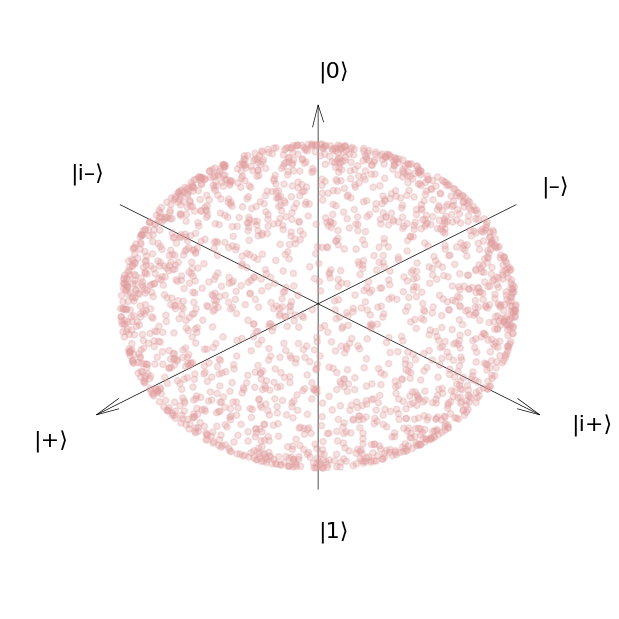

In [41]:
from scipy.stats import rv_continuous

class sin_prob_dist(rv_continuous):
    def _pdf(self, theta):
        # The 0.5 is so that the distribution is normalized
        return 0.5 * np.sin(theta)

# Samples of theta should be drawn from between 0 and pi
sin_sampler = sin_prob_dist(a=0, b=np.pi)

@qml.qnode(dev)
def haar_random_unitary():
    phi, omega = 2 * np.pi * np.random.uniform(size=2) # Sample phi and omega as normal
    theta = sin_sampler.rvs(size=1) # Sample theta from our new distribution
    qml.Rot(phi-2, theta, omega+2, wires=0)
    return qml.state()

haar_samples = [haar_random_unitary() for _ in range(num_samples)]
haar_bloch_vectors = np.array([convert_to_bloch_vector(s) for s in haar_samples])

plot_bloch_sphere(haar_bloch_vectors)

We see that when we use the correct measure, our qubit states are now
much better distributed over the sphere. Putting this information
together, we can now write the explicit form for the single-qubit Haar
measure:

$$d\mu_2 = \sin \theta d\theta \cdot d\omega \cdot d\phi.$$

Show me more math!
==================

While we can easily visualize the single-qubit case, this is no longer
possible when we increase the number of qubits. Regardless, we can still
obtain a mathematical expression for the Haar measure in arbitrary
dimensions. In the previous section, we expressed the Haar measure in
terms of a set of parameters that can be used to specify the unitary
group $U(2)$. Such a parametrization is not unique, and in fact there
are multiple ways to *factorize*, or decompose an $N$-dimensional
unitary operation into a set of parameters.

Many of these parametrizations come to us from the study of photonics.
Here, arbitrary operations are broken down into elementary operations
involving only a few parameters which correspond directly to parameters
of the physical apparatus used to implement them (beamsplitters and
phase shifts). Rather than qubits, such operations act on modes, or
*qumodes*. They are expressed as elements of the $N$-dimensional
[special unitary
group](https://en.wikipedia.org/wiki/Special_unitary_group). This group,
written as $SU(N)$, is the continuous group consisting of all
$N \times N$ unitary operations with determinant 1 (essentially like
$U(N)$, minus a potential global phase).

::: {.note}
::: {.title}
Note
:::

Elements of $SU(N)$ and $U(N)$ can still be considered as multi-qubit
operations in the cases where $N$ is a power of 2, but they must be
translated from continuous-variable operations into qubit operations.
(In PennyLane, this can be done by feeding the unitaries to the
`~.pennylane.QubitUnitary`{.interpreted-text role="class"} operation
directly. Alternatively, one can use *quantum compilation* to express
the operations as a sequence of elementary gates such as Pauli rotations
and CNOTs.)
:::

::: {.admonition}
Tip

If you haven\'t had many opportunities to work in terms of qumodes, the
[Strawberry Fields
documentation](https://strawberryfields.ai/photonics/concepts/photonics.html)
is a good starting point.
:::

For example, we saw already above that for $N=2$, we can write

$$\begin{aligned}
U(\phi, \theta, \omega) = \begin{pmatrix} e^{-i(\phi + \omega)/2}
                    \cos(\theta/2) & -e^{i(\phi - \omega)/2} \sin(\theta/2)
                    \\ e^{-i(\phi - \omega)/2} \sin(\theta/2) & e^{i(\phi +
                    \omega)/2} \cos(\theta/2) \end{pmatrix}.
\end{aligned}$$

This unitary can be factorized as follows:

$$\begin{aligned}
U(\phi, \theta, \omega) =
    \begin{pmatrix}
      e^{-i\omega/2} & 0 \\ 0 & e^{i\omega/2}
    \end{pmatrix}
    \begin{pmatrix}
      \cos(\theta/2) & -\sin(\theta/2) \\ \sin(\theta/2) & \cos(\theta/2)
    \end{pmatrix}
   \begin{pmatrix}
      e^{-i\phi/2} & 0 \\ 0 & e^{i\phi/2}
    \end{pmatrix}
\end{aligned}$$

The middle operation is a beamsplitter; the other two operations are
phase shifts. We saw earlier that for $N=2$, $d\mu_2 = \sin\theta
d\theta d\omega d\phi$\-\--note how the parameter in the beamsplitter
contributes to the measure in a different way than those of the phase
shifts. As mentioned above, for larger values of $N$ there are multiple
ways to decompose the unitary. Such decompositions rewrite elements in
$SU(N)$ acting on $N$ modes as a sequence of operations acting only on 2
modes, $SU(2)$, and single-mode phase shifts. Shown below are three
examples,,:

![](/demonstrations/haar_measure/unitaries.png){.align-center
width="95.0%"}

In these graphics, every wire is a different mode. Every box represents
an operation on one or more modes, and the number in the box indicates
the number of parameters. The boxes containing a `1` are simply phase
shifts on individual modes. The blocks containing a `3` are $SU(2)$
transforms with 3 parameters, such as the $U(\phi, \theta, \omega)$
above. Those containing a `2` are $SU(2)$ transforms on pairs of modes
with 2 parameters, similar to the 3-parameter ones but with
$\omega = \phi$.

Although the decompositions all produce the same set of operations,
their structure and parametrization may have consequences in practice.
The first has a particularly convenient form that leads to a recursive
definition of the Haar measure. The decomposition is formulated
recursively such that an $SU(N)$ operation can be implemented by
sandwiching an $SU(2)$ transformation between two $SU(N-1)$
transformations, like so:

|

![](/demonstrations/haar_measure/sun.svg){.align-center width="80.0%"}

|

The Haar measure is then constructed recursively as a product of 3
terms. The first term depends on the parameters in the first $SU(N-1)$
transformation; the second depends on the parameters in the lone $SU(2)$
transformation; and the third term depends on the parameters in the
other $SU(N-1)$ transformation.

$SU(2)$ is the \"base case\" of the recursion---we simply have the Haar
measure as expressed above.

|

![](/demonstrations/haar_measure/su2_haar.svg){.align-center
width="25.0%"}

|

Moving on up, we can write elements of $SU(3)$ as a sequence of three
$SU(2)$ transformations. The Haar measure $d\mu_3$ then consists of two
copies of $d\mu_2$, with an extra term in between to take into account
the middle transformation.

|

![](/demonstrations/haar_measure/su3_haar.svg){.align-center
width="80.0%"}

|

For $SU(4)$ and upwards, the form changes slightly, but still follows
the pattern of two copies of $d\mu_{N-1}$ with a term in between.

|

![](/demonstrations/haar_measure/su4_premerge.svg){.align-center
width="90.0%"}

|

For larger systems, however, the recursive composition allows for some
of the $SU(2)$ transformations on the lower modes to be grouped. We can
take advantage of this and aggregate some of the parameters:

|

![](/demonstrations/haar_measure/su4_triangle_merge.svg){.align-center
width="100.0%"}

|

This leads to one copy of $d\mu_{N-1}$, which we\'ll denote as
$d\mu_{N-1}^\prime$, containing only a portion of the full set of terms
(as detailed in, this is called a *coset measure*).

|

![](/demonstrations/haar_measure/su4_haar.svg){.align-center
width="100.0%"}

|

Putting everything together, we have that

$$d\mu_N = d\mu_{N-1}^\prime \times \sin \theta_{N-1}
\sin^{2(N-2)}\left(\frac{\theta_{N-1}}{2}\right) d\theta_{N-1} d\omega_{N-1} \times d\mu_{N-1}$$

The middle portion depends on the value of $N$, and the parameters
$\theta_{N-1}$ and $\omega_{N-1}$ contained in the $(N-1)$\'th $SU(N)$
transformation. This is thus a convenient, systematic way to construct
the $N$-dimensional Haar measure for the unitary group. As a final note,
even though unitaries can be parametrized in different ways, the
underlying Haar measure is *unique*. This is a consequence of it being
an invariant measure, as will be shown later.

Haar-random matrices from the $QR$ decomposition
================================================

Nice-looking math aside, sometimes you just need to generate a large
number of high-dimensional Haar-random matrices. It would be very
cumbersome to sample and keep track of the distributions of so many
parameters; furthermore, the measure above requires you to parametrize
your operations in a fixed way. There is a much quicker way to perform
the sampling by taking a (slightly modified) [QR
decomposition](https://en.wikipedia.org/wiki/QR_decomposition) of
complex-valued matrices. This algorithm is detailed in, and consists of
the following steps:

1.  Generate an $N \times N$ matrix $Z$ with complex numbers $a+bi$
    where both $a$ and $b$ are normally distributed with mean 0 and
    variance 1 (this is sampling from the distribution known as the
    *Ginibre ensemble*).
2.  Compute a QR decomposition $Z = QR$.
3.  Compute the diagonal matrix
    $\Lambda = \hbox{diag}(R_{ii}/|R_{ii}|)$.
4.  Compute $Q^\prime = Q \Lambda$, which will be Haar-random.


In [42]:
from numpy.linalg import qr

def qr_haar(N):
    """Generate a Haar-random matrix using the QR decomposition."""
    # Step 1
    A, B = np.random.normal(size=(N, N)), np.random.normal(size=(N, N))
    Z = A + 1j * B

    # Step 2
    Q, R = qr(Z)

    # Step 3
    Lambda = np.diag([R[i, i] / np.abs(R[i, i]) for i in range(N)])

    # Step 4
    return np.dot(Q, Lambda)

Let\'s check that this method actually generates Haar-random unitaries
by trying it out for $N=2$ and plotting on the Bloch sphere.


<ipython-input-40-8623f0bf407e>:10: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 7


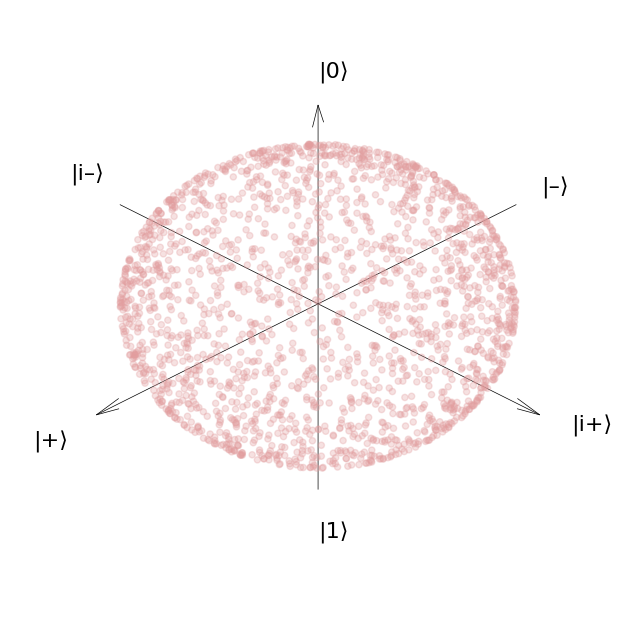

In [43]:
@qml.qnode(dev)
def qr_haar_random_unitary():
    qml.QubitUnitary(qr_haar(2), wires=0)
    return qml.state()

qr_haar_samples = [qr_haar_random_unitary() for _ in range(num_samples)]
qr_haar_bloch_vectors = np.array([convert_to_bloch_vector(s) for s in qr_haar_samples])
plot_bloch_sphere(qr_haar_bloch_vectors)

As expected, we find our qubit states are distributed uniformly over the
sphere. This particular method is what\'s implemented in packages like
`scipy`\'s
[unitary\_group](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.unitary_group.html)
function.

Now, it\'s clear that this method works, but it is also important to
understand *why* it works. Step 1 is fairly straightforward---the base
of our samples is a matrix full of complex values chosen from a typical
distribution. This isn\'t enough by itself, since unitary matrices also
have constraints---their rows and columns must be orthonormal. These
constraints are where step 2 comes in---the outcome of a generic QR
decomposition consists of an *orthonormal* matrix $Q$, and and upper
triangular matrix $R$. Since our original matrix was complex-valued, we
end up with a $Q$ that is in fact already unitary. But why not stop
there? Why do we then perform steps 3 and 4?

Steps 3 and 4 are needed because, while the QR decomposition yields a
unitary, it is not a unitary that is properly Haar-random. In, it is
explained that a uniform distribution over unitary matrices should also
yield a uniform distribution over the *eigenvalues* of those matrices,
i.e., every eigenvalue should be equally likely. Just using the QR
decomposition out of the box produces an *uneven* distribution of
eigenvalues of the unitaries! This discrepancy stems from the fact that
the QR decomposition is not unique. We can take any unitary diagonal
matrix $\Lambda$, and re-express the decomposition as
$QR = Q\Lambda \Lambda^\dagger R = Q^\prime R^\prime$. Step 3 removes
this redundancy by fixing a $\Lambda$ that depends on $R$, leading to a
unique value of $Q^\prime = Q \Lambda$, and a uniform distribution of
eigenvalues.

::: {.admonition}
Try it!

Use the `qr_haar` function above to generate random unitaries and
construct a distribution of their eigenvalues. Then, comment out the
lines for steps 3 and 4 and do the same---you\'ll find that the
distribution is no longer uniform. Check out reference for additional
details and examples.
:::


Fun (and not-so-fun) facts
==========================

We\'ve now learned what the Haar measure is, and both an analytical and
numerical means of sampling quantum states and unitary operations
uniformly at random. The Haar measure also has many neat properties that
play a role in quantum computing.

Invariance of the Haar measure
------------------------------

Earlier, we showed that the Haar measure is used when integrating
functions over the unitary group:

$$\int_{V \in U(N)} f(V) d\mu_N(V).$$

One of the defining features of the Haar measure is that it is both left
and right *invariant* under unitary transformations. That is,

$$\int_{V \in U(N)} f(\color{red}{W}V) d\mu_N(V) =  \int_{V \in U(N)} f(V\color{red}{W}) d\mu_N(V) =  \int_{V \in U(N)} f(V) d\mu_N(V).$$

This holds true for *any* other $N\times N$ unitary $W$! A consequence
of such invariance is that if $V$ is Haar-random, then so is $V^T,$
$V^\dagger,$ and any product of another unitary matrix and $V$ (where
the product may be taken on either side).

Another consequence of this invariance has to do with the structure of
the entries themselves: they must all come from the same distribution.
This is because the measure remains invariant under permutations, since
permutations are unitary\-\--the whole thing still has to be Haar random
no matter how the entries are ordered, so all distributions must be the
same. The specific distribution is complex numbers $a+bi$ where both $a$
and $b$ has mean 0 and variance $1/N$[^1] (so, much like Ginibre
ensemble we used in the QR decomposition above, but with a different
variance and constraints due to orthonormality).

Concentration of measure
------------------------

An unfortunate (although interesting) property of the Haar measure is
that it suffers from the phenomenon of [concentration of
measure](https://en.wikipedia.org/wiki/Concentration_of_measure). Most
of the \"stuff\" in the space concentrates around a certain area, and
this gets worse as the size of the system increases. You can see the
beginnings of by looking at the sphere. For the 3-dimensional sphere, we
saw graphically how there is concentration around the equator, and how
the measure takes that into account with the additional factor of
$\sin \theta$. This property becomes increasingly prominent for
[higher-dimensional spheres](https://en.wikipedia.org/wiki/N-sphere).

::: {.important}
::: {.title}
Important
:::

The concentration described here is not referring to what we witnessed
earlier on, when we sampled quantum states (points on the Bloch sphere)
incorrectly and found that they clustered around the poles. However,
that is not unrelated. Concentration of measure refers to where the
measure itself is concentrated, and which parts of the space should be
more heavily weighted. For the case of the sphere, it is the equatorial
area, and when we didn\'t sample properly and take that concentration
into account, we obtained an uneven distribution.
:::

Let\'s consider an $N$-dimensional unit sphere. Points on the sphere, or
vectors in this space, are parametrized by $N-1$ real coordinates.
Suppose we have some function $f$ that maps points on that sphere to
real numbers. Sample a point $x$ on that sphere from the uniform
measure, and compute the value of $f(x)$. How close do you think the
result will be to the mean value of the function, $E[f]$, over the
entire sphere?

A result called [Levy\'s
lemma](https://en.wikipedia.org/wiki/Concentration_of_measure#Concentration_on_the_sphere)
[^2],[^3] expresses how likely it is that $f(x)$ is a specific distance
away from the mean. It states that, for an $x$ selected uniformly at
random, the probability that $f(x)$ deviates from $E[f]$ by some amount
$\epsilon$ is bounded by:

$$\hbox{Pr}(|f(x) - E[f]| \ge \epsilon) \leq 2 \exp\left[-\frac{N\epsilon^2}{9\pi^3 \eta^2}\right].$$

A constraint on the function $f$ is that it must be [Lipschitz
continuous](https://en.wikipedia.org/wiki/Lipschitz_continuity), where
$\eta$ is the *Lipschitz constant* of the function. The important aspect
here is the likelihood of deviating significantly from the mean by an
amount $\epsilon$ decreases exponentially with $\epsilon.$ Furthermore,
increasing the dimension $N$ also makes the deviation exponentially less
likely.

Now, this result seems unrelated to quantum states---it concerns
higher-dimensional spheres. However, recall that a quantum state vector
is a complex vector whose squared values sum to 1, similar to vectors on
a sphere. If you \"unroll\" a quantum state vector of dimension
$N = 2^n$ by stacking its real and complex parts, you end with a vector
of length $2 \cdot 2^{n}$ which ends up behaving just like a unit vector
on the sphere in this dimension. Given that measure concentrates on
spheres, and quantum state vectors can be converted to vectors on
spheres, functions on random quantum states will also demonstrate
concentration.

This is bad news! To do useful things in quantum computing, we need a
lot of qubits. But the more qubits we have, the more our randomly
sampled states will look the same (specifically, random states will
concentrate around the maximally entangled state[^4]). This has
important consequences for near-term algorithms (as detailed in the next
section), and any algorithm that involves uniform sampling of quantum
states and operations.

Haar measure and barren plateaus
--------------------------------

Suppose you are venturing out to solve a new problem using an algorithm
such as the
`variational quantum eigensolver </demos/tutorial_vqe>`{.interpreted-text
role="doc"}. A critical component of such methods is the choice of
`variational ansatz
</glossary/circuit_ansatz>`{.interpreted-text role="doc"}. Having now
learned a bit about the properties of the Haar measure, you may think it
would make sense to use this for the parametrization. Variational
ansaetze are, after all, parametrized quantum circuits, so why not
choose an ansatz that corresponds directly to a parametrization for
Haar-random unitaries? The initial parameter selection will give you a
state in the Hilbert space uniformly at random. Then, since this ansatz
spans the entire Hilbert space, you\'re guaranteed to be able to
represent the target ground state with your ansatz, and it should be
able to find it with no issue \... right?

Unfortunately, while such an ansatz is extremely *expressive* (i.e., it
is capable of representing any possible state), these ansaetze actually
suffer the most from the barren plateau problem[^5],[^6].
`Barren plateaus </demos/tutorial_barren_plateaus>`{.interpreted-text
role="doc"} are regions in the cost landscape of a parametrized circuit
where both the gradient and its variance approach 0, leading the
optimizer to get stuck in a local minimum. This was explored recently in
the work of[^7], wherein closeness to the Haar measure was actually used
as a metric for expressivity. The closer things are to the Haar measure,
the more expressive they are, but they are also more prone to exhibiting
barren plateaus.

![Image source:[^8]. A highly expressive ansatz that can access much of
the space of possible unitaries (i.e., an ansatz capable of producing
unitaries in something close to a Haar-random manner) is very likely to
have flat cost landscapes and suffer from the barren plateau
problem.](/demonstrations/haar_measure/holmes-costlandscapes.png){.align-center
width="50.0%"}

It turns out that the types of ansaetze know as *hardware-efficient
ansaetze* also suffer from this problem if they are \"random enough\"
(this notion will be formalized in a future demo). It was shown in[^9]
that this is a consequence of the concentration of measure phenomenon
described above. The values of gradients and variances can be computed
for classes of circuits on average by integrating with respect to the
Haar measure, and it is shown that these values decrease exponentially
in the number of qubits, and thus huge swaths of the cost landscape are
simply and fundamentally flat.

Conclusion
==========

The Haar measure plays an important role in quantum computing---anywhere
you might be dealing with sampling random circuits, or averaging over
all possible unitary operations, you\'ll want to do so with respect to
the Haar measure.

There are two important aspects of this that we have yet to touch upon,
however. The first is whether it is efficient to sample from the Haar
measure---given that the number of parameters to keep track of is
exponential in the number of qubits, certainly not. But a more
interesting question is do we *need* to always sample from the full Haar
measure? The answer to this is \"no\" in a very interesting way.
Depending on the task at hand, you may be able to take a shortcut using
something called a *unitary design*. In an upcoming demo, we will
explore the amazing world of unitary designs and their applications!

References
==========

About the author
================

[^1]: E. Meckes (2019) [\"The Random Matrix Theory of the Classical
    Compact
    Groups\"](https://case.edu/artsci/math/esmeckes/Haar_book.pdf),
    Cambridge University Press.

[^2]: M. Gerken (2013) \"Measure concentration: Levy\'s Lemma\"
    ([lecture
    notes](http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.679.2560)).

[^3]: P. Hayden, D. W. Leung, and A. Winter (2006) \"Aspects of generic
    entanglement\", [Comm. Math. Phys. Vol. 265, No. 1, pp.
    95-117](https://link.springer.com/article/10.1007%2Fs00220-006-1535-6).
    ([arXiv](https://arxiv.org/abs/quant-ph/0407049))

[^4]: P. Hayden, D. W. Leung, and A. Winter (2006) \"Aspects of generic
    entanglement\", [Comm. Math. Phys. Vol. 265, No. 1, pp.
    95-117](https://link.springer.com/article/10.1007%2Fs00220-006-1535-6).
    ([arXiv](https://arxiv.org/abs/quant-ph/0407049))

[^5]: J. R. McClean, S. Boixo, V. N. Smelyanskiy, R. Babbush, and H.
    Neven (2018) \"Barren plateaus in quantum neural network training
    landscapes\", [Nature Communications,
    9(1)](http://dx.doi.org/10.1038/s41467-018-07090-4).
    ([arXiv](https://arxiv.org/abs/1803.11173))

[^6]: Z. Holmes, K. Sharma, M. Cerezo, and P. J. Coles (2021)
    \"Connecting ansatz expressibility to gradient magnitudes and barren
    plateaus\". ([arXiv](https://arxiv.org/abs/2101.02138))

[^7]: Z. Holmes, K. Sharma, M. Cerezo, and P. J. Coles (2021)
    \"Connecting ansatz expressibility to gradient magnitudes and barren
    plateaus\". ([arXiv](https://arxiv.org/abs/2101.02138))

[^8]: Z. Holmes, K. Sharma, M. Cerezo, and P. J. Coles (2021)
    \"Connecting ansatz expressibility to gradient magnitudes and barren
    plateaus\". ([arXiv](https://arxiv.org/abs/2101.02138))

[^9]: J. R. McClean, S. Boixo, V. N. Smelyanskiy, R. Babbush, and H.
    Neven (2018) \"Barren plateaus in quantum neural network training
    landscapes\", [Nature Communications,
    9(1)](http://dx.doi.org/10.1038/s41467-018-07090-4).
    ([arXiv](https://arxiv.org/abs/1803.11173))
